# CV Assignment 0

## Roll no - 20171002

### Requirements :-
##### Libraries:-
* Numpy
* os
* Python 3.x
* scikit-image
* matplotlib
* math
* mpl_toolkits.axes_grid1

### To run this notebook successfully, please ensure the following steps.
* Ensure that all the libraries mentioned above are installed
* Ensure that in the current working directory the folder **A0_resources** and its entire folder structure exists and is maintained. **This is the input data to notebook.**
* For the WebCam question, if the code is run, it will start generating video from the machine where it is run. Results are uploaded separately to Google drive.


### Note:-
* ***If any of the steps are missing/files are missing, then some parts of the code may or may not work***
* *The Results folder contains some outputs saved from the script*
* It is advised to use the testing machine in "plugged in" mode, to avoid core suppression as happens in most modern PCs.
* **Results are uploaded on Google drive at this link, `https://drive.google.com/drive/folders/1gmrD19pSQdm0xp4MgDxT8yxmOXCg896y?usp=sharing`**
* Resources are also uploaded in case in they are not uploadable on Moodle under the name `A0_resources`, at this link **`https://drive.google.com/drive/folders/1QlZwpCxuEjjKaMt6P3ehHj56k2wyugKO?usp=sharing`**. If need be, copy the directory to the location of this iPython notebook. Please note that this is hosted on IIITH's Google Drive.

In [1]:
# Importing libraries
import numpy as np
import os
import skimage
from imageio import imread, imwrite
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import cv2,math
import time

In [2]:
# RGB to greyscale
def rgb2gray(image):
    '''
    A function that takes in input an image and returns its greyscale version
    '''
    if (len(image.shape)==2):
        return image
    elif (len(image.shape)==3):
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
        output = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return output.astype('uint8')

In [3]:
def mergeImage(fg, bg, threshold=150):
    """
    This function takes in two images, fg and bg, i.e. foreground and background and separates the Object
    of Interest in foreground and merges into the background. The parameter threshold controls the quality
    of merging, i.e., shadows, borders, color
    """
    bg = cv2.resize(bg,(fg.shape[1],fg.shape[0]))
    mask = np.array([48,254,0])
    output = bg
    mask_fill = np.ones(fg.shape)
    mask_fill[:,:,0] = np.full((fg.shape[0],fg.shape[1]),mask[0])
    mask_fill[:,:,1] = np.full((fg.shape[0],fg.shape[1]),mask[1])
    mask_fill[:,:,2] = np.full((fg.shape[0],fg.shape[1]),mask[2])
    output[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),0]=fg[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),0]
    output[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),1]=fg[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),1]
    output[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),2]=fg[(np.sqrt(np.sum((fg-mask_fill)**2,axis=2))>threshold),2]
    return output

[[ 48]
 [254]
 [  0]]
(1080, 1280, 3)


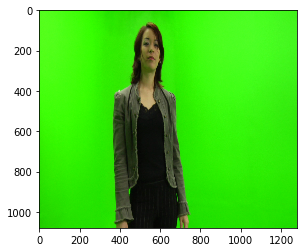

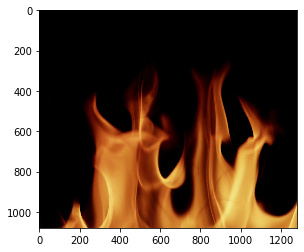

In [10]:
test_fg = imread('./A0_resources/Dolly No Trackers/hcw_dolly_no_trackers.0047.png')
test_bg = imread('./A0_resources/Bg_Frames/f008.jpg')
print(mostFreqColor(test_fg))
test_bg = cv2.resize(test_bg,(test_fg.shape[1],test_fg.shape[0]))
print(test_bg.shape)
plt.imshow(test_fg)
plt.show()
plt.imshow(test_bg)
plt.show()

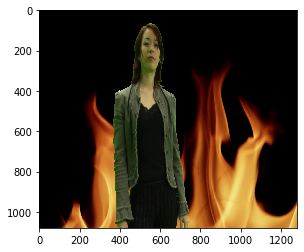

In [11]:
plt.imshow(mergeImage(test_fg,test_bg))
plt.show()

## Task 1
*Video ↔ Images: Write a program to convert a given video to its constituent images. Your output should be in a specified folder. Write another program that will merge a set of images in a folder into a single video. You should be able to control the frame rate in the video that is created.*

The first subtask is to take a videostream and sample it to collect frames of the video. Optimally if the frames are continuous and played at more than 24 FPS, then human eyes can not distinguish different streams. A trained eye can discern sampled frames at lower FPS rates.

The flow of code is as follows :-
* Create a VideoCapture object that reads a video and prepares for playback at its originally created FPS.
* Set a delay value based on time between 2 consecutive frames. That is inverse of desired frame rate.
* Use a read function to store the frames occuring at the offsets of the delay.
* Save the frames in order by assigning a counter value that counts frames.

The notable challenges were :-
* Writing the string format for name dynamically.
* Maintaining the delay.
* Hardware limitations to not process more than 90 FPS (otherwise local machine started running out of storage and available runtime memory.)

The second subtask is to take a set of videoframes and stack it at appropriate gaps to build the videostream. Optimally if the frames are continuous and played at more than 24 FPS, then human eyes can not distinguish different streams. A trained eye can discern sampled frames at lower FPS rates.

The flow of code is as follows :-
* Collect all frames in sorted order for semantic continuity. (Did using sorting by name of frame)
* Set a delay value based on time between 2 consecutive frames. That is inverse of desired frame rate.
* Use a write function to stack the frames occuring at the offsets of the delay.
* Save the stack by encoding it depending on extension of video.

The notable challenges were :-
* Sorting the string format for name dynamically.
* Maintaining the delay.
* Hardware limitations to not process more than 90 FPS (otherwise local machine started running out of storage and available runtime memory.)

Learnings:-
* How to create a dataset of frames from video and viceversa. Used it in third task of Chroma Keying.
* How to label/annotate frames for easy access and maintaining properties of video dataset (like semantic continuity)

Results :-
* Taken a popular song, *Chaand ne Kaho* by *Sachin-Jigar* and generated frames and stored in a directory labelled VideoFrames.
* Reused the same frames to generate a video `output_2.avi` at a different frame rate.

In [12]:
path = "./VideoFrames/"
filename = 'Chaand Ne Kaho | Sachin-Jigar | Jigardan | Yash Soni | Chaal Jeevi Laiye | Zen Music Gujarati.mp4'
try:
    os.mkdir(path)
except OSError:
    print('Folder creation failed. Saving Frames Aborted.')
    save_chk = False
else:
    print('Folder creation successful. Saving Frames.')
    save_chk = True

vidobj1 = cv2.VideoCapture('./A0_resources/'+filename)
fps = vidobj1.get(cv2.CAP_PROP_FPS)
print ("FPS : {0}".format(fps))

if (vidobj1.isOpened()==False):
    print('Error in displaying video, please retry')
count = 1
fr = 2
fps_req = 1/fr
print ("Displaying at "+str(fps_req)+" FPS")
delay = 0

def save_service(vidobj, delay):
    vidobj.set(cv2.CAP_PROP_POS_MSEC,delay*1000)
    state,frame = vidobj.read()
    if state == True:
        if save_chk == True:
            cv2.imwrite(path+"f"+str(count)+".jpg", frame)
        cv2.imshow('Accessed Frames',frame)
        cv2.waitKey(1)
    return state

state = save_service(vidobj1, delay)
while(state):
    count = count+1
    delay = delay + fr
    state = save_service(vidobj1, delay)

vidobj1.release()
cv2.destroyAllWindows()

Folder creation successful. Saving Frames.
FPS : 24.0
Displaying at 0.5 FPS


In [15]:
ip_path = "./VideoFrames/"
fps_w = 10
size_w = (640,480)

frames = []
files = []
for f in os.listdir(ip_path):
    if os.path.isfile(os.path.join(ip_path,f)):
        files.append(f)
        
files.sort(key=lambda x: int(os.path.splitext(x)[0][1:]))

for i in range(len(files)):
    filename = ip_path + files[i]
    frame = cv2.imread(filename)
    height, width, layers = frame.shape
    size_w = (width,height)
    frames.append(frame)

writer = cv2.VideoWriter('output_2.avi',cv2.VideoWriter_fourcc(*'DIVX'),fps_w,size_w)

for i in range(len(frames)):
    writer.write(frames[i])
    
writer.release()
cv2.destroyAllWindows()

## Task 2
*Capturing Images: Learn how to capture frames from a webcam connected to
your computer and save them as images in a folder. You may use either the
built-in camera of your laptop or an external one connected through USB. You
should also be able to display the frames (the video) on the screen while
capturing.*

The task is to take a videostream from webcam and sample it to collect frames of the video. Optimally if the frames are continuous and played at more than 24 FPS, then human eyes can not distinguish different streams. A trained eye can discern sampled frames at lower FPS rates.

The flow of code is as follows :-
* Create a VideoCapture object that reads video from webcam and prepares for playback at its originally created FPS.
* Set a delay value based on time between 2 consecutive frames. That is inverse of desired frame rate.
* Use a read function to store the frames occuring at the offsets of the delay.
* Save the frames in order by assigning a counter value that counts frames.

The notable challenges were :-
* Writing the string format for name dynamically.
* Maintaining the delay.
* Hardware limitations to not process more than 90 FPS and 902 frames (otherwise local machine started running out of storage and available runtime memory.)


Learnings:-
* How to create a dataset of frames from video and viceversa. Used it in third task of Chroma Keying.
* How to label/annotate frames for easy access and maintaining properties of video dataset (like semantic continuity)
* How to capture videos from webcam to use for entertainment.

Results :-
* Captured webcam frames and stored in a directory labelled WebcamFrames.

In [4]:
path = "./WebcamFrames/"
try:
    os.mkdir(path)
except OSError:
    print('Folder creation failed. Saving Frames Aborted.')
    save_chk2 = False
else:
    print('Folder creation successful. Saving Frames.')
    save_chk2 = True

vidobj2 = cv2.VideoCapture(0)

if (vidobj2.isOpened()==False):
    print('Error in displaying video, please retry')
count = 1
fr = 0.1
fps_req = 1/fr
print ("Displaying at "+str(fps_req)+" FPS")
delay = 0

def save_service(vidobj, delay, save_chk):
    vidobj.set(cv2.CAP_PROP_POS_MSEC,delay*1000)
    state,frame = vidobj.read()
    if state == True:
        if save_chk == True:
            cv2.imwrite(path+"f"+str(count)+".jpg", frame)
        cv2.imshow('Accessed Frames',frame)
        cv2.waitKey(1)
    return state

state = save_service(vidobj2, delay,  save_chk2)

maxfr = 902
while(state==True and count<maxfr):
    count = count+1
    delay = delay + fr
    state = save_service(vidobj2, delay,  save_chk2)

vidobj2.release()
cv2.destroyAllWindows()

Folder creation successful. Saving Frames.
Displaying at 10.0 FPS


## Task 3
*Create an interesting composite of two videos using this technique, possibly with
one video including yourselves.*

The task is to perform Chroma Keying on a foreground and background set of videoframes. Chroma keying, is a visual effects/post-production technique for compositing (layering) two images or video streams together based on colour hues (chroma range). The technique has been used in many fields to remove a background from the subject of a photo or video – particularly the newscasting, motion picture, and video game industries. A colour range in the foreground footage is made transparent, allowing separately filmed background footage or a static image to be inserted into the scene. The chroma keying technique is commonly used in video production and post-production.

The flow of code is as follows :-
* Take the foreground and background videoframes.
* For each frame in the foreground (assuming that is green screened to replace background), find the maximally occuring tuple in the frame (if prior information about color of screen is not available), otherwise use the known maximally occurring RGB tuple.
* Initialise output to be same as background frame.
* For each pixel in the frame, consider the RGB tuple. Use some similarity or distance metric (I have used L2 norm) and compare the metric to the threshold to decide whether it is a part of green screen or not. If not, copy the RGB tuple at the pixel to the corresponding pixel in the output(replace)

The notable challenges were :-
* While generating foreground, if optically the object is very shiny/reflective or translucent, it creates displeasing effects in the final video. The effect is controlled by the threshold. so for solving this, we need a threshold function that decides values based on location in the image as well as neighbours of the pixel location. This suggest using unary and pairwise potential functions to define threshold function
* Maintaining the semantic similarity of foreground and background is a challenge for foreground and background videos of differing length.
* Hardware limitations to generate better quality of videos.
* If we consider using devices that have orientation as an option (like a handheld device), then it is very necessary to crop regions that have been zero padded, or, might be necessary to rotate to justify semantically. One of the examples that I have created needed this scenario.

Learnings :-
* To understand how to maintain content similarity and the challenges associated with that.
* To create more aesthetically pleasing videos by understanding the limitation of the camera capturing the video or the device that processes the captured frames.

Examples :-
* The video labelled as `CK_own_vid.avi` is a video of my own frames captured using webcam and then overlayed on a news channel parody.
* The video labelled as `CK_CSGO_in_CVIT_vid.avi` is a video of a player from popular game *Counter Strike:Global Offensive* overlayed on a video recording of KCIS Block. The player frames were sourced from YouTube and the background was collected by me at 1080p, 30FPS.

In [13]:
ip_fg_path = "./A0_resources/FG_Newsroom_Frames/"
ip_bg_path = "./WebcamFrames/"
fps_w = 30
files_fg = []
files_bg = []
output = []
for f in os.listdir(ip_fg_path):
    if os.path.isfile(os.path.join(ip_fg_path,f)):
        files_fg.append(f)
files_fg.sort()
for f in os.listdir(ip_bg_path):
    if os.path.isfile(os.path.join(ip_bg_path,f)):
        files_bg.append(f)

files_fg.sort(key=lambda x: int(os.path.splitext(x)[0][1:]))
files_bg.sort(key=lambda x: int(os.path.splitext(x)[0][1:]))
for i in range(min(len(files_fg),len(files_bg))):
    filename_ip_fg = ip_fg_path + files_fg[i]
    filename_ip_bg = ip_bg_path + files_bg[i]
    frame_fg = imread(filename_ip_fg)
    frame_bg = imread(filename_ip_bg)
    print(filename_ip_fg,filename_ip_bg)
    output.append(cv2.cvtColor(mergeImage(frame_fg,frame_bg),cv2.COLOR_RGB2BGR))
    size_w = (output[i].shape[1],output[i].shape[0])
    
writer = cv2.VideoWriter('CK_own_vid.avi',cv2.VideoWriter_fourcc(*'DIVX'),fps_w,size_w)
for i in range(len(output)):
    writer.write(output[i])
    
writer.release()

./A0_resources/FG_Newsroom_Frames/f2.jpg ./WebcamFrames/f1.jpg
./A0_resources/FG_Newsroom_Frames/f3.jpg ./WebcamFrames/f2.jpg
./A0_resources/FG_Newsroom_Frames/f4.jpg ./WebcamFrames/f3.jpg
./A0_resources/FG_Newsroom_Frames/f5.jpg ./WebcamFrames/f4.jpg
./A0_resources/FG_Newsroom_Frames/f6.jpg ./WebcamFrames/f5.jpg
./A0_resources/FG_Newsroom_Frames/f7.jpg ./WebcamFrames/f6.jpg
./A0_resources/FG_Newsroom_Frames/f8.jpg ./WebcamFrames/f7.jpg
./A0_resources/FG_Newsroom_Frames/f9.jpg ./WebcamFrames/f8.jpg
./A0_resources/FG_Newsroom_Frames/f10.jpg ./WebcamFrames/f9.jpg
./A0_resources/FG_Newsroom_Frames/f11.jpg ./WebcamFrames/f10.jpg
./A0_resources/FG_Newsroom_Frames/f12.jpg ./WebcamFrames/f11.jpg
./A0_resources/FG_Newsroom_Frames/f13.jpg ./WebcamFrames/f12.jpg
./A0_resources/FG_Newsroom_Frames/f14.jpg ./WebcamFrames/f13.jpg
./A0_resources/FG_Newsroom_Frames/f15.jpg ./WebcamFrames/f14.jpg
./A0_resources/FG_Newsroom_Frames/f16.jpg ./WebcamFrames/f15.jpg
./A0_resources/FG_Newsroom_Frames/f17.jpg 

./A0_resources/FG_Newsroom_Frames/f128.jpg ./WebcamFrames/f127.jpg
./A0_resources/FG_Newsroom_Frames/f129.jpg ./WebcamFrames/f128.jpg
./A0_resources/FG_Newsroom_Frames/f130.jpg ./WebcamFrames/f129.jpg
./A0_resources/FG_Newsroom_Frames/f131.jpg ./WebcamFrames/f130.jpg
./A0_resources/FG_Newsroom_Frames/f132.jpg ./WebcamFrames/f131.jpg
./A0_resources/FG_Newsroom_Frames/f133.jpg ./WebcamFrames/f132.jpg
./A0_resources/FG_Newsroom_Frames/f134.jpg ./WebcamFrames/f133.jpg
./A0_resources/FG_Newsroom_Frames/f135.jpg ./WebcamFrames/f134.jpg
./A0_resources/FG_Newsroom_Frames/f136.jpg ./WebcamFrames/f135.jpg
./A0_resources/FG_Newsroom_Frames/f137.jpg ./WebcamFrames/f136.jpg
./A0_resources/FG_Newsroom_Frames/f138.jpg ./WebcamFrames/f137.jpg
./A0_resources/FG_Newsroom_Frames/f139.jpg ./WebcamFrames/f138.jpg
./A0_resources/FG_Newsroom_Frames/f140.jpg ./WebcamFrames/f139.jpg
./A0_resources/FG_Newsroom_Frames/f141.jpg ./WebcamFrames/f140.jpg
./A0_resources/FG_Newsroom_Frames/f142.jpg ./WebcamFrames/f141

./A0_resources/FG_Newsroom_Frames/f251.jpg ./WebcamFrames/f250.jpg
./A0_resources/FG_Newsroom_Frames/f252.jpg ./WebcamFrames/f251.jpg
./A0_resources/FG_Newsroom_Frames/f253.jpg ./WebcamFrames/f252.jpg
./A0_resources/FG_Newsroom_Frames/f254.jpg ./WebcamFrames/f253.jpg
./A0_resources/FG_Newsroom_Frames/f255.jpg ./WebcamFrames/f254.jpg
./A0_resources/FG_Newsroom_Frames/f256.jpg ./WebcamFrames/f255.jpg
./A0_resources/FG_Newsroom_Frames/f257.jpg ./WebcamFrames/f256.jpg
./A0_resources/FG_Newsroom_Frames/f258.jpg ./WebcamFrames/f257.jpg
./A0_resources/FG_Newsroom_Frames/f259.jpg ./WebcamFrames/f258.jpg
./A0_resources/FG_Newsroom_Frames/f260.jpg ./WebcamFrames/f259.jpg
./A0_resources/FG_Newsroom_Frames/f261.jpg ./WebcamFrames/f260.jpg
./A0_resources/FG_Newsroom_Frames/f262.jpg ./WebcamFrames/f261.jpg
./A0_resources/FG_Newsroom_Frames/f263.jpg ./WebcamFrames/f262.jpg
./A0_resources/FG_Newsroom_Frames/f264.jpg ./WebcamFrames/f263.jpg
./A0_resources/FG_Newsroom_Frames/f265.jpg ./WebcamFrames/f264

./A0_resources/FG_Newsroom_Frames/f374.jpg ./WebcamFrames/f373.jpg
./A0_resources/FG_Newsroom_Frames/f375.jpg ./WebcamFrames/f374.jpg
./A0_resources/FG_Newsroom_Frames/f376.jpg ./WebcamFrames/f375.jpg
./A0_resources/FG_Newsroom_Frames/f377.jpg ./WebcamFrames/f376.jpg
./A0_resources/FG_Newsroom_Frames/f378.jpg ./WebcamFrames/f377.jpg
./A0_resources/FG_Newsroom_Frames/f379.jpg ./WebcamFrames/f378.jpg
./A0_resources/FG_Newsroom_Frames/f380.jpg ./WebcamFrames/f379.jpg
./A0_resources/FG_Newsroom_Frames/f381.jpg ./WebcamFrames/f380.jpg
./A0_resources/FG_Newsroom_Frames/f382.jpg ./WebcamFrames/f381.jpg
./A0_resources/FG_Newsroom_Frames/f383.jpg ./WebcamFrames/f382.jpg
./A0_resources/FG_Newsroom_Frames/f384.jpg ./WebcamFrames/f383.jpg
./A0_resources/FG_Newsroom_Frames/f385.jpg ./WebcamFrames/f384.jpg
./A0_resources/FG_Newsroom_Frames/f386.jpg ./WebcamFrames/f385.jpg
./A0_resources/FG_Newsroom_Frames/f387.jpg ./WebcamFrames/f386.jpg
./A0_resources/FG_Newsroom_Frames/f388.jpg ./WebcamFrames/f387

./A0_resources/FG_Newsroom_Frames/f497.jpg ./WebcamFrames/f496.jpg
./A0_resources/FG_Newsroom_Frames/f498.jpg ./WebcamFrames/f497.jpg
./A0_resources/FG_Newsroom_Frames/f499.jpg ./WebcamFrames/f498.jpg
./A0_resources/FG_Newsroom_Frames/f500.jpg ./WebcamFrames/f499.jpg
./A0_resources/FG_Newsroom_Frames/f501.jpg ./WebcamFrames/f500.jpg
./A0_resources/FG_Newsroom_Frames/f502.jpg ./WebcamFrames/f501.jpg
./A0_resources/FG_Newsroom_Frames/f503.jpg ./WebcamFrames/f502.jpg
./A0_resources/FG_Newsroom_Frames/f504.jpg ./WebcamFrames/f503.jpg
./A0_resources/FG_Newsroom_Frames/f505.jpg ./WebcamFrames/f504.jpg
./A0_resources/FG_Newsroom_Frames/f506.jpg ./WebcamFrames/f505.jpg
./A0_resources/FG_Newsroom_Frames/f507.jpg ./WebcamFrames/f506.jpg
./A0_resources/FG_Newsroom_Frames/f508.jpg ./WebcamFrames/f507.jpg
./A0_resources/FG_Newsroom_Frames/f509.jpg ./WebcamFrames/f508.jpg
./A0_resources/FG_Newsroom_Frames/f510.jpg ./WebcamFrames/f509.jpg
./A0_resources/FG_Newsroom_Frames/f511.jpg ./WebcamFrames/f510

./A0_resources/FG_Newsroom_Frames/f620.jpg ./WebcamFrames/f619.jpg
./A0_resources/FG_Newsroom_Frames/f621.jpg ./WebcamFrames/f620.jpg
./A0_resources/FG_Newsroom_Frames/f622.jpg ./WebcamFrames/f621.jpg
./A0_resources/FG_Newsroom_Frames/f623.jpg ./WebcamFrames/f622.jpg
./A0_resources/FG_Newsroom_Frames/f624.jpg ./WebcamFrames/f623.jpg
./A0_resources/FG_Newsroom_Frames/f625.jpg ./WebcamFrames/f624.jpg
./A0_resources/FG_Newsroom_Frames/f626.jpg ./WebcamFrames/f625.jpg
./A0_resources/FG_Newsroom_Frames/f627.jpg ./WebcamFrames/f626.jpg
./A0_resources/FG_Newsroom_Frames/f628.jpg ./WebcamFrames/f627.jpg
./A0_resources/FG_Newsroom_Frames/f629.jpg ./WebcamFrames/f628.jpg
./A0_resources/FG_Newsroom_Frames/f630.jpg ./WebcamFrames/f629.jpg
./A0_resources/FG_Newsroom_Frames/f631.jpg ./WebcamFrames/f630.jpg
./A0_resources/FG_Newsroom_Frames/f632.jpg ./WebcamFrames/f631.jpg
./A0_resources/FG_Newsroom_Frames/f633.jpg ./WebcamFrames/f632.jpg
./A0_resources/FG_Newsroom_Frames/f634.jpg ./WebcamFrames/f633

./A0_resources/FG_Newsroom_Frames/f743.jpg ./WebcamFrames/f742.jpg
./A0_resources/FG_Newsroom_Frames/f744.jpg ./WebcamFrames/f743.jpg
./A0_resources/FG_Newsroom_Frames/f745.jpg ./WebcamFrames/f744.jpg
./A0_resources/FG_Newsroom_Frames/f746.jpg ./WebcamFrames/f745.jpg
./A0_resources/FG_Newsroom_Frames/f747.jpg ./WebcamFrames/f746.jpg
./A0_resources/FG_Newsroom_Frames/f748.jpg ./WebcamFrames/f747.jpg
./A0_resources/FG_Newsroom_Frames/f749.jpg ./WebcamFrames/f748.jpg
./A0_resources/FG_Newsroom_Frames/f750.jpg ./WebcamFrames/f749.jpg
./A0_resources/FG_Newsroom_Frames/f751.jpg ./WebcamFrames/f750.jpg
./A0_resources/FG_Newsroom_Frames/f752.jpg ./WebcamFrames/f751.jpg
./A0_resources/FG_Newsroom_Frames/f753.jpg ./WebcamFrames/f752.jpg
./A0_resources/FG_Newsroom_Frames/f754.jpg ./WebcamFrames/f753.jpg
./A0_resources/FG_Newsroom_Frames/f755.jpg ./WebcamFrames/f754.jpg
./A0_resources/FG_Newsroom_Frames/f756.jpg ./WebcamFrames/f755.jpg
./A0_resources/FG_Newsroom_Frames/f757.jpg ./WebcamFrames/f756

./A0_resources/FG_Newsroom_Frames/f866.jpg ./WebcamFrames/f865.jpg
./A0_resources/FG_Newsroom_Frames/f867.jpg ./WebcamFrames/f866.jpg
./A0_resources/FG_Newsroom_Frames/f868.jpg ./WebcamFrames/f867.jpg
./A0_resources/FG_Newsroom_Frames/f869.jpg ./WebcamFrames/f868.jpg
./A0_resources/FG_Newsroom_Frames/f870.jpg ./WebcamFrames/f869.jpg
./A0_resources/FG_Newsroom_Frames/f871.jpg ./WebcamFrames/f870.jpg
./A0_resources/FG_Newsroom_Frames/f872.jpg ./WebcamFrames/f871.jpg
./A0_resources/FG_Newsroom_Frames/f873.jpg ./WebcamFrames/f872.jpg
./A0_resources/FG_Newsroom_Frames/f874.jpg ./WebcamFrames/f873.jpg
./A0_resources/FG_Newsroom_Frames/f875.jpg ./WebcamFrames/f874.jpg
./A0_resources/FG_Newsroom_Frames/f876.jpg ./WebcamFrames/f875.jpg
./A0_resources/FG_Newsroom_Frames/f877.jpg ./WebcamFrames/f876.jpg
./A0_resources/FG_Newsroom_Frames/f878.jpg ./WebcamFrames/f877.jpg
./A0_resources/FG_Newsroom_Frames/f879.jpg ./WebcamFrames/f878.jpg
./A0_resources/FG_Newsroom_Frames/f880.jpg ./WebcamFrames/f879

In [4]:
def rotate_image(image, angle):
    image_size = (image.shape[1], image.shape[0])
    image_center = tuple(np.array(image_size) / 2)
    rot_mat = np.vstack([cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]])
    rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])
    image_w2 = image_size[0] * 0.5
    image_h2 = image_size[1] * 0.5
    rotated_coords = [
        (np.array([-image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2,  image_h2]) * rot_mat_notranslate).A[0],
        (np.array([-image_w2, -image_h2]) * rot_mat_notranslate).A[0],
        (np.array([ image_w2, -image_h2]) * rot_mat_notranslate).A[0]
    ]
    x_coords = [pt[0] for pt in rotated_coords]
    x_pos = [x for x in x_coords if x > 0]
    x_neg = [x for x in x_coords if x < 0]
    y_coords = [pt[1] for pt in rotated_coords]
    y_pos = [y for y in y_coords if y > 0]
    y_neg = [y for y in y_coords if y < 0]
    right_bound = max(x_pos)
    left_bound = min(x_neg)
    top_bound = max(y_pos)
    bot_bound = min(y_neg)
    new_w = int(abs(right_bound - left_bound))
    new_h = int(abs(top_bound - bot_bound))
    trans_mat = np.matrix([
        [1, 0, int(new_w * 0.5 - image_w2)],
        [0, 1, int(new_h * 0.5 - image_h2)],
        [0, 0, 1]
    ])
    affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]
    result = cv2.warpAffine(image,affine_mat,(new_w, new_h),flags=cv2.INTER_LINEAR)
    return result


def largest_rotated_rect(w, h, angle):
    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi
    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)
    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)
    delta = math.pi - alpha - gamma
    length = h if (w < h) else w
    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)
    y = a * math.cos(gamma)
    x = y * math.tan(gamma)
    return (bb_w - 2 * x,bb_h - 2 * y)

def crop_around_center(image, width, height):
    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))
    if(width > image_size[0]):
        width = image_size[0]
    if(height > image_size[1]):
        height = image_size[1]
    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)
    return image[y1:y2, x1:x2]

In [5]:
cap = cv2.VideoCapture('./A0_resources/VID_20200123_202456.mp4')
path = './A0_resources/BG_CVIT_Frames/'
try:
    os.mkdir(path)
except OSError:
    print('Folder creation failed. Saving Frames Aborted.')
else:
    print('Folder creation successful. Saving Frames.')
    
count = 0
ret = True
while(ret):
    ret, frame = cap.read()
#     print(frame.shape)
    if ret == False:
        break
    count=count+1
    frame = rotate(frame, 270)
    tol = -1
    image_orig = np.copy(frame)
    image_width, image_height = frame.shape[:2]
    image_rotated = rotate_image(image_orig, 0)
    image_rotated_cropped = crop_around_center(image_rotated,*largest_rotated_rect(image_width,image_height,math.radians(0)))
    cv2.imshow('frame',image_rotated_cropped)
    cv2.imwrite(path+"f"+str(count)+".jpg", image_rotated_cropped)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Folder creation successful. Saving Frames.


In [7]:
cap = cv2.VideoCapture('./A0_resources/CS_GO greenscreen pack+download 720P 60FPS.mp4')
path = './A0_resources/FG_CSGO_Frames/'
try:
    os.mkdir(path)
except OSError:
    print('Folder creation failed. Saving Frames Aborted.')
else:
    print('Folder creation successful. Saving Frames.')
    
count = 0
ret = True
while(ret):
    ret, frame = cap.read()
#     print(frame.shape)
    if ret == False:
        break
    count=count+1
    cv2.imshow('frame',frame)
    cv2.imwrite(path+"f"+str(count)+".jpg", frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Folder creation successful. Saving Frames.


In [13]:
ip_fg_path = "./A0_resources/FG_CSGO_Frames/"
ip_bg_path = "./A0_resources/BG_CVIT_Frames/"
fps_w = 25
files_fg = []
files_bg = []
output = []
for f in os.listdir(ip_fg_path):
    if os.path.isfile(os.path.join(ip_fg_path,f)):
        files_fg.append(f)
files_fg.sort()
for f in os.listdir(ip_bg_path):
    if os.path.isfile(os.path.join(ip_bg_path,f)):
        files_bg.append(f)

files_fg.sort(key=lambda x: int(os.path.splitext(x)[0][1:]))
files_bg.sort(key=lambda x: int(os.path.splitext(x)[0][1:]))
# maxfr = 2500
for i in range(min(len(files_fg),len(files_bg))):
    filename_ip_fg = ip_fg_path + files_fg[i]
    filename_ip_bg = ip_bg_path + files_bg[i]
    print(filename_ip_fg, filename_ip_bg)
    frame_fg = imread(filename_ip_fg)
    frame_bg = imread(filename_ip_bg)
    output.append(cv2.cvtColor(mergeImage(frame_fg,frame_bg),cv2.COLOR_RGB2BGR))
    size_w = (output[i].shape[1],output[i].shape[0])
    
writer = cv2.VideoWriter('CK_CSGO_in_CVIT_vid.avi',cv2.VideoWriter_fourcc(*'DIVX'),fps_w,size_w)
for i in range(len(output)):
    writer.write(output[i])
    
writer.release()

./A0_resources/FG_CSGO_Frames/f6.jpg ./A0_resources/BG_CVIT_Frames/f1.jpg
./A0_resources/FG_CSGO_Frames/f7.jpg ./A0_resources/BG_CVIT_Frames/f2.jpg
./A0_resources/FG_CSGO_Frames/f8.jpg ./A0_resources/BG_CVIT_Frames/f3.jpg
./A0_resources/FG_CSGO_Frames/f9.jpg ./A0_resources/BG_CVIT_Frames/f4.jpg
./A0_resources/FG_CSGO_Frames/f10.jpg ./A0_resources/BG_CVIT_Frames/f5.jpg
./A0_resources/FG_CSGO_Frames/f11.jpg ./A0_resources/BG_CVIT_Frames/f6.jpg
./A0_resources/FG_CSGO_Frames/f12.jpg ./A0_resources/BG_CVIT_Frames/f7.jpg
./A0_resources/FG_CSGO_Frames/f13.jpg ./A0_resources/BG_CVIT_Frames/f8.jpg
./A0_resources/FG_CSGO_Frames/f14.jpg ./A0_resources/BG_CVIT_Frames/f9.jpg
./A0_resources/FG_CSGO_Frames/f15.jpg ./A0_resources/BG_CVIT_Frames/f10.jpg
./A0_resources/FG_CSGO_Frames/f16.jpg ./A0_resources/BG_CVIT_Frames/f11.jpg
./A0_resources/FG_CSGO_Frames/f17.jpg ./A0_resources/BG_CVIT_Frames/f12.jpg
./A0_resources/FG_CSGO_Frames/f18.jpg ./A0_resources/BG_CVIT_Frames/f13.jpg
./A0_resources/FG_CSGO_Fr

./A0_resources/FG_CSGO_Frames/f114.jpg ./A0_resources/BG_CVIT_Frames/f109.jpg
./A0_resources/FG_CSGO_Frames/f115.jpg ./A0_resources/BG_CVIT_Frames/f110.jpg
./A0_resources/FG_CSGO_Frames/f116.jpg ./A0_resources/BG_CVIT_Frames/f111.jpg
./A0_resources/FG_CSGO_Frames/f117.jpg ./A0_resources/BG_CVIT_Frames/f112.jpg
./A0_resources/FG_CSGO_Frames/f118.jpg ./A0_resources/BG_CVIT_Frames/f113.jpg
./A0_resources/FG_CSGO_Frames/f119.jpg ./A0_resources/BG_CVIT_Frames/f114.jpg
./A0_resources/FG_CSGO_Frames/f120.jpg ./A0_resources/BG_CVIT_Frames/f115.jpg
./A0_resources/FG_CSGO_Frames/f121.jpg ./A0_resources/BG_CVIT_Frames/f116.jpg
./A0_resources/FG_CSGO_Frames/f122.jpg ./A0_resources/BG_CVIT_Frames/f117.jpg
./A0_resources/FG_CSGO_Frames/f123.jpg ./A0_resources/BG_CVIT_Frames/f118.jpg
./A0_resources/FG_CSGO_Frames/f124.jpg ./A0_resources/BG_CVIT_Frames/f119.jpg
./A0_resources/FG_CSGO_Frames/f125.jpg ./A0_resources/BG_CVIT_Frames/f120.jpg
./A0_resources/FG_CSGO_Frames/f126.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f220.jpg ./A0_resources/BG_CVIT_Frames/f215.jpg
./A0_resources/FG_CSGO_Frames/f221.jpg ./A0_resources/BG_CVIT_Frames/f216.jpg
./A0_resources/FG_CSGO_Frames/f222.jpg ./A0_resources/BG_CVIT_Frames/f217.jpg
./A0_resources/FG_CSGO_Frames/f223.jpg ./A0_resources/BG_CVIT_Frames/f218.jpg
./A0_resources/FG_CSGO_Frames/f224.jpg ./A0_resources/BG_CVIT_Frames/f219.jpg
./A0_resources/FG_CSGO_Frames/f225.jpg ./A0_resources/BG_CVIT_Frames/f220.jpg
./A0_resources/FG_CSGO_Frames/f226.jpg ./A0_resources/BG_CVIT_Frames/f221.jpg
./A0_resources/FG_CSGO_Frames/f227.jpg ./A0_resources/BG_CVIT_Frames/f222.jpg
./A0_resources/FG_CSGO_Frames/f228.jpg ./A0_resources/BG_CVIT_Frames/f223.jpg
./A0_resources/FG_CSGO_Frames/f229.jpg ./A0_resources/BG_CVIT_Frames/f224.jpg
./A0_resources/FG_CSGO_Frames/f230.jpg ./A0_resources/BG_CVIT_Frames/f225.jpg
./A0_resources/FG_CSGO_Frames/f231.jpg ./A0_resources/BG_CVIT_Frames/f226.jpg
./A0_resources/FG_CSGO_Frames/f232.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f326.jpg ./A0_resources/BG_CVIT_Frames/f321.jpg
./A0_resources/FG_CSGO_Frames/f327.jpg ./A0_resources/BG_CVIT_Frames/f322.jpg
./A0_resources/FG_CSGO_Frames/f328.jpg ./A0_resources/BG_CVIT_Frames/f323.jpg
./A0_resources/FG_CSGO_Frames/f329.jpg ./A0_resources/BG_CVIT_Frames/f324.jpg
./A0_resources/FG_CSGO_Frames/f330.jpg ./A0_resources/BG_CVIT_Frames/f325.jpg
./A0_resources/FG_CSGO_Frames/f331.jpg ./A0_resources/BG_CVIT_Frames/f326.jpg
./A0_resources/FG_CSGO_Frames/f332.jpg ./A0_resources/BG_CVIT_Frames/f327.jpg
./A0_resources/FG_CSGO_Frames/f333.jpg ./A0_resources/BG_CVIT_Frames/f328.jpg
./A0_resources/FG_CSGO_Frames/f334.jpg ./A0_resources/BG_CVIT_Frames/f329.jpg
./A0_resources/FG_CSGO_Frames/f335.jpg ./A0_resources/BG_CVIT_Frames/f330.jpg
./A0_resources/FG_CSGO_Frames/f336.jpg ./A0_resources/BG_CVIT_Frames/f331.jpg
./A0_resources/FG_CSGO_Frames/f337.jpg ./A0_resources/BG_CVIT_Frames/f332.jpg
./A0_resources/FG_CSGO_Frames/f338.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f432.jpg ./A0_resources/BG_CVIT_Frames/f427.jpg
./A0_resources/FG_CSGO_Frames/f433.jpg ./A0_resources/BG_CVIT_Frames/f428.jpg
./A0_resources/FG_CSGO_Frames/f434.jpg ./A0_resources/BG_CVIT_Frames/f429.jpg
./A0_resources/FG_CSGO_Frames/f435.jpg ./A0_resources/BG_CVIT_Frames/f430.jpg
./A0_resources/FG_CSGO_Frames/f436.jpg ./A0_resources/BG_CVIT_Frames/f431.jpg
./A0_resources/FG_CSGO_Frames/f437.jpg ./A0_resources/BG_CVIT_Frames/f432.jpg
./A0_resources/FG_CSGO_Frames/f438.jpg ./A0_resources/BG_CVIT_Frames/f433.jpg
./A0_resources/FG_CSGO_Frames/f439.jpg ./A0_resources/BG_CVIT_Frames/f434.jpg
./A0_resources/FG_CSGO_Frames/f440.jpg ./A0_resources/BG_CVIT_Frames/f435.jpg
./A0_resources/FG_CSGO_Frames/f441.jpg ./A0_resources/BG_CVIT_Frames/f436.jpg
./A0_resources/FG_CSGO_Frames/f442.jpg ./A0_resources/BG_CVIT_Frames/f437.jpg
./A0_resources/FG_CSGO_Frames/f443.jpg ./A0_resources/BG_CVIT_Frames/f438.jpg
./A0_resources/FG_CSGO_Frames/f444.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f538.jpg ./A0_resources/BG_CVIT_Frames/f533.jpg
./A0_resources/FG_CSGO_Frames/f539.jpg ./A0_resources/BG_CVIT_Frames/f534.jpg
./A0_resources/FG_CSGO_Frames/f540.jpg ./A0_resources/BG_CVIT_Frames/f535.jpg
./A0_resources/FG_CSGO_Frames/f541.jpg ./A0_resources/BG_CVIT_Frames/f536.jpg
./A0_resources/FG_CSGO_Frames/f542.jpg ./A0_resources/BG_CVIT_Frames/f537.jpg
./A0_resources/FG_CSGO_Frames/f543.jpg ./A0_resources/BG_CVIT_Frames/f538.jpg
./A0_resources/FG_CSGO_Frames/f544.jpg ./A0_resources/BG_CVIT_Frames/f539.jpg
./A0_resources/FG_CSGO_Frames/f545.jpg ./A0_resources/BG_CVIT_Frames/f540.jpg
./A0_resources/FG_CSGO_Frames/f546.jpg ./A0_resources/BG_CVIT_Frames/f541.jpg
./A0_resources/FG_CSGO_Frames/f547.jpg ./A0_resources/BG_CVIT_Frames/f542.jpg
./A0_resources/FG_CSGO_Frames/f548.jpg ./A0_resources/BG_CVIT_Frames/f543.jpg
./A0_resources/FG_CSGO_Frames/f549.jpg ./A0_resources/BG_CVIT_Frames/f544.jpg
./A0_resources/FG_CSGO_Frames/f550.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f644.jpg ./A0_resources/BG_CVIT_Frames/f639.jpg
./A0_resources/FG_CSGO_Frames/f645.jpg ./A0_resources/BG_CVIT_Frames/f640.jpg
./A0_resources/FG_CSGO_Frames/f646.jpg ./A0_resources/BG_CVIT_Frames/f641.jpg
./A0_resources/FG_CSGO_Frames/f647.jpg ./A0_resources/BG_CVIT_Frames/f642.jpg
./A0_resources/FG_CSGO_Frames/f648.jpg ./A0_resources/BG_CVIT_Frames/f643.jpg
./A0_resources/FG_CSGO_Frames/f649.jpg ./A0_resources/BG_CVIT_Frames/f644.jpg
./A0_resources/FG_CSGO_Frames/f650.jpg ./A0_resources/BG_CVIT_Frames/f645.jpg
./A0_resources/FG_CSGO_Frames/f651.jpg ./A0_resources/BG_CVIT_Frames/f646.jpg
./A0_resources/FG_CSGO_Frames/f652.jpg ./A0_resources/BG_CVIT_Frames/f647.jpg
./A0_resources/FG_CSGO_Frames/f653.jpg ./A0_resources/BG_CVIT_Frames/f648.jpg
./A0_resources/FG_CSGO_Frames/f654.jpg ./A0_resources/BG_CVIT_Frames/f649.jpg
./A0_resources/FG_CSGO_Frames/f655.jpg ./A0_resources/BG_CVIT_Frames/f650.jpg
./A0_resources/FG_CSGO_Frames/f656.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f750.jpg ./A0_resources/BG_CVIT_Frames/f745.jpg
./A0_resources/FG_CSGO_Frames/f751.jpg ./A0_resources/BG_CVIT_Frames/f746.jpg
./A0_resources/FG_CSGO_Frames/f752.jpg ./A0_resources/BG_CVIT_Frames/f747.jpg
./A0_resources/FG_CSGO_Frames/f753.jpg ./A0_resources/BG_CVIT_Frames/f748.jpg
./A0_resources/FG_CSGO_Frames/f754.jpg ./A0_resources/BG_CVIT_Frames/f749.jpg
./A0_resources/FG_CSGO_Frames/f755.jpg ./A0_resources/BG_CVIT_Frames/f750.jpg
./A0_resources/FG_CSGO_Frames/f756.jpg ./A0_resources/BG_CVIT_Frames/f751.jpg
./A0_resources/FG_CSGO_Frames/f757.jpg ./A0_resources/BG_CVIT_Frames/f752.jpg
./A0_resources/FG_CSGO_Frames/f758.jpg ./A0_resources/BG_CVIT_Frames/f753.jpg
./A0_resources/FG_CSGO_Frames/f759.jpg ./A0_resources/BG_CVIT_Frames/f754.jpg
./A0_resources/FG_CSGO_Frames/f760.jpg ./A0_resources/BG_CVIT_Frames/f755.jpg
./A0_resources/FG_CSGO_Frames/f761.jpg ./A0_resources/BG_CVIT_Frames/f756.jpg
./A0_resources/FG_CSGO_Frames/f762.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f856.jpg ./A0_resources/BG_CVIT_Frames/f851.jpg
./A0_resources/FG_CSGO_Frames/f857.jpg ./A0_resources/BG_CVIT_Frames/f852.jpg
./A0_resources/FG_CSGO_Frames/f858.jpg ./A0_resources/BG_CVIT_Frames/f853.jpg
./A0_resources/FG_CSGO_Frames/f859.jpg ./A0_resources/BG_CVIT_Frames/f854.jpg
./A0_resources/FG_CSGO_Frames/f860.jpg ./A0_resources/BG_CVIT_Frames/f855.jpg
./A0_resources/FG_CSGO_Frames/f861.jpg ./A0_resources/BG_CVIT_Frames/f856.jpg
./A0_resources/FG_CSGO_Frames/f862.jpg ./A0_resources/BG_CVIT_Frames/f857.jpg
./A0_resources/FG_CSGO_Frames/f863.jpg ./A0_resources/BG_CVIT_Frames/f858.jpg
./A0_resources/FG_CSGO_Frames/f864.jpg ./A0_resources/BG_CVIT_Frames/f859.jpg
./A0_resources/FG_CSGO_Frames/f865.jpg ./A0_resources/BG_CVIT_Frames/f860.jpg
./A0_resources/FG_CSGO_Frames/f866.jpg ./A0_resources/BG_CVIT_Frames/f861.jpg
./A0_resources/FG_CSGO_Frames/f867.jpg ./A0_resources/BG_CVIT_Frames/f862.jpg
./A0_resources/FG_CSGO_Frames/f868.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f962.jpg ./A0_resources/BG_CVIT_Frames/f957.jpg
./A0_resources/FG_CSGO_Frames/f963.jpg ./A0_resources/BG_CVIT_Frames/f958.jpg
./A0_resources/FG_CSGO_Frames/f964.jpg ./A0_resources/BG_CVIT_Frames/f959.jpg
./A0_resources/FG_CSGO_Frames/f965.jpg ./A0_resources/BG_CVIT_Frames/f960.jpg
./A0_resources/FG_CSGO_Frames/f966.jpg ./A0_resources/BG_CVIT_Frames/f961.jpg
./A0_resources/FG_CSGO_Frames/f967.jpg ./A0_resources/BG_CVIT_Frames/f962.jpg
./A0_resources/FG_CSGO_Frames/f968.jpg ./A0_resources/BG_CVIT_Frames/f963.jpg
./A0_resources/FG_CSGO_Frames/f969.jpg ./A0_resources/BG_CVIT_Frames/f964.jpg
./A0_resources/FG_CSGO_Frames/f970.jpg ./A0_resources/BG_CVIT_Frames/f965.jpg
./A0_resources/FG_CSGO_Frames/f971.jpg ./A0_resources/BG_CVIT_Frames/f966.jpg
./A0_resources/FG_CSGO_Frames/f972.jpg ./A0_resources/BG_CVIT_Frames/f967.jpg
./A0_resources/FG_CSGO_Frames/f973.jpg ./A0_resources/BG_CVIT_Frames/f968.jpg
./A0_resources/FG_CSGO_Frames/f974.jpg ./A0_resources/BG_CVIT_Fr

./A0_resources/FG_CSGO_Frames/f1066.jpg ./A0_resources/BG_CVIT_Frames/f1061.jpg
./A0_resources/FG_CSGO_Frames/f1067.jpg ./A0_resources/BG_CVIT_Frames/f1062.jpg
./A0_resources/FG_CSGO_Frames/f1068.jpg ./A0_resources/BG_CVIT_Frames/f1063.jpg
./A0_resources/FG_CSGO_Frames/f1069.jpg ./A0_resources/BG_CVIT_Frames/f1064.jpg
./A0_resources/FG_CSGO_Frames/f1070.jpg ./A0_resources/BG_CVIT_Frames/f1065.jpg
./A0_resources/FG_CSGO_Frames/f1071.jpg ./A0_resources/BG_CVIT_Frames/f1066.jpg
./A0_resources/FG_CSGO_Frames/f1072.jpg ./A0_resources/BG_CVIT_Frames/f1067.jpg
./A0_resources/FG_CSGO_Frames/f1073.jpg ./A0_resources/BG_CVIT_Frames/f1068.jpg
./A0_resources/FG_CSGO_Frames/f1074.jpg ./A0_resources/BG_CVIT_Frames/f1069.jpg
./A0_resources/FG_CSGO_Frames/f1075.jpg ./A0_resources/BG_CVIT_Frames/f1070.jpg
./A0_resources/FG_CSGO_Frames/f1076.jpg ./A0_resources/BG_CVIT_Frames/f1071.jpg
./A0_resources/FG_CSGO_Frames/f1077.jpg ./A0_resources/BG_CVIT_Frames/f1072.jpg
./A0_resources/FG_CSGO_Frames/f1078.jpg 

./A0_resources/FG_CSGO_Frames/f1169.jpg ./A0_resources/BG_CVIT_Frames/f1164.jpg
./A0_resources/FG_CSGO_Frames/f1170.jpg ./A0_resources/BG_CVIT_Frames/f1165.jpg
./A0_resources/FG_CSGO_Frames/f1171.jpg ./A0_resources/BG_CVIT_Frames/f1166.jpg
./A0_resources/FG_CSGO_Frames/f1172.jpg ./A0_resources/BG_CVIT_Frames/f1167.jpg
./A0_resources/FG_CSGO_Frames/f1173.jpg ./A0_resources/BG_CVIT_Frames/f1168.jpg
./A0_resources/FG_CSGO_Frames/f1174.jpg ./A0_resources/BG_CVIT_Frames/f1169.jpg
./A0_resources/FG_CSGO_Frames/f1175.jpg ./A0_resources/BG_CVIT_Frames/f1170.jpg
./A0_resources/FG_CSGO_Frames/f1176.jpg ./A0_resources/BG_CVIT_Frames/f1171.jpg
./A0_resources/FG_CSGO_Frames/f1177.jpg ./A0_resources/BG_CVIT_Frames/f1172.jpg
./A0_resources/FG_CSGO_Frames/f1178.jpg ./A0_resources/BG_CVIT_Frames/f1173.jpg
./A0_resources/FG_CSGO_Frames/f1179.jpg ./A0_resources/BG_CVIT_Frames/f1174.jpg
./A0_resources/FG_CSGO_Frames/f1180.jpg ./A0_resources/BG_CVIT_Frames/f1175.jpg
./A0_resources/FG_CSGO_Frames/f1181.jpg 

./A0_resources/FG_CSGO_Frames/f1272.jpg ./A0_resources/BG_CVIT_Frames/f1267.jpg
./A0_resources/FG_CSGO_Frames/f1273.jpg ./A0_resources/BG_CVIT_Frames/f1268.jpg
./A0_resources/FG_CSGO_Frames/f1274.jpg ./A0_resources/BG_CVIT_Frames/f1269.jpg
./A0_resources/FG_CSGO_Frames/f1275.jpg ./A0_resources/BG_CVIT_Frames/f1270.jpg
./A0_resources/FG_CSGO_Frames/f1276.jpg ./A0_resources/BG_CVIT_Frames/f1271.jpg
./A0_resources/FG_CSGO_Frames/f1277.jpg ./A0_resources/BG_CVIT_Frames/f1272.jpg
./A0_resources/FG_CSGO_Frames/f1278.jpg ./A0_resources/BG_CVIT_Frames/f1273.jpg
./A0_resources/FG_CSGO_Frames/f1279.jpg ./A0_resources/BG_CVIT_Frames/f1274.jpg
./A0_resources/FG_CSGO_Frames/f1280.jpg ./A0_resources/BG_CVIT_Frames/f1275.jpg
./A0_resources/FG_CSGO_Frames/f1281.jpg ./A0_resources/BG_CVIT_Frames/f1276.jpg
./A0_resources/FG_CSGO_Frames/f1282.jpg ./A0_resources/BG_CVIT_Frames/f1277.jpg
./A0_resources/FG_CSGO_Frames/f1283.jpg ./A0_resources/BG_CVIT_Frames/f1278.jpg
./A0_resources/FG_CSGO_Frames/f1284.jpg 

./A0_resources/FG_CSGO_Frames/f1375.jpg ./A0_resources/BG_CVIT_Frames/f1370.jpg
./A0_resources/FG_CSGO_Frames/f1376.jpg ./A0_resources/BG_CVIT_Frames/f1371.jpg
./A0_resources/FG_CSGO_Frames/f1377.jpg ./A0_resources/BG_CVIT_Frames/f1372.jpg
./A0_resources/FG_CSGO_Frames/f1378.jpg ./A0_resources/BG_CVIT_Frames/f1373.jpg
./A0_resources/FG_CSGO_Frames/f1379.jpg ./A0_resources/BG_CVIT_Frames/f1374.jpg
./A0_resources/FG_CSGO_Frames/f1380.jpg ./A0_resources/BG_CVIT_Frames/f1375.jpg
./A0_resources/FG_CSGO_Frames/f1381.jpg ./A0_resources/BG_CVIT_Frames/f1376.jpg
./A0_resources/FG_CSGO_Frames/f1382.jpg ./A0_resources/BG_CVIT_Frames/f1377.jpg
./A0_resources/FG_CSGO_Frames/f1383.jpg ./A0_resources/BG_CVIT_Frames/f1378.jpg
./A0_resources/FG_CSGO_Frames/f1384.jpg ./A0_resources/BG_CVIT_Frames/f1379.jpg
./A0_resources/FG_CSGO_Frames/f1385.jpg ./A0_resources/BG_CVIT_Frames/f1380.jpg
./A0_resources/FG_CSGO_Frames/f1386.jpg ./A0_resources/BG_CVIT_Frames/f1381.jpg
./A0_resources/FG_CSGO_Frames/f1387.jpg 

./A0_resources/FG_CSGO_Frames/f1478.jpg ./A0_resources/BG_CVIT_Frames/f1473.jpg
./A0_resources/FG_CSGO_Frames/f1479.jpg ./A0_resources/BG_CVIT_Frames/f1474.jpg
./A0_resources/FG_CSGO_Frames/f1480.jpg ./A0_resources/BG_CVIT_Frames/f1475.jpg
./A0_resources/FG_CSGO_Frames/f1481.jpg ./A0_resources/BG_CVIT_Frames/f1476.jpg
./A0_resources/FG_CSGO_Frames/f1482.jpg ./A0_resources/BG_CVIT_Frames/f1477.jpg
./A0_resources/FG_CSGO_Frames/f1483.jpg ./A0_resources/BG_CVIT_Frames/f1478.jpg
./A0_resources/FG_CSGO_Frames/f1484.jpg ./A0_resources/BG_CVIT_Frames/f1479.jpg
./A0_resources/FG_CSGO_Frames/f1485.jpg ./A0_resources/BG_CVIT_Frames/f1480.jpg
./A0_resources/FG_CSGO_Frames/f1486.jpg ./A0_resources/BG_CVIT_Frames/f1481.jpg
./A0_resources/FG_CSGO_Frames/f1487.jpg ./A0_resources/BG_CVIT_Frames/f1482.jpg
./A0_resources/FG_CSGO_Frames/f1488.jpg ./A0_resources/BG_CVIT_Frames/f1483.jpg
./A0_resources/FG_CSGO_Frames/f1489.jpg ./A0_resources/BG_CVIT_Frames/f1484.jpg
./A0_resources/FG_CSGO_Frames/f1490.jpg 

./A0_resources/FG_CSGO_Frames/f1581.jpg ./A0_resources/BG_CVIT_Frames/f1576.jpg
./A0_resources/FG_CSGO_Frames/f1582.jpg ./A0_resources/BG_CVIT_Frames/f1577.jpg
./A0_resources/FG_CSGO_Frames/f1583.jpg ./A0_resources/BG_CVIT_Frames/f1578.jpg
./A0_resources/FG_CSGO_Frames/f1584.jpg ./A0_resources/BG_CVIT_Frames/f1579.jpg
./A0_resources/FG_CSGO_Frames/f1585.jpg ./A0_resources/BG_CVIT_Frames/f1580.jpg
./A0_resources/FG_CSGO_Frames/f1586.jpg ./A0_resources/BG_CVIT_Frames/f1581.jpg
./A0_resources/FG_CSGO_Frames/f1587.jpg ./A0_resources/BG_CVIT_Frames/f1582.jpg
./A0_resources/FG_CSGO_Frames/f1588.jpg ./A0_resources/BG_CVIT_Frames/f1583.jpg
./A0_resources/FG_CSGO_Frames/f1589.jpg ./A0_resources/BG_CVIT_Frames/f1584.jpg
./A0_resources/FG_CSGO_Frames/f1590.jpg ./A0_resources/BG_CVIT_Frames/f1585.jpg
./A0_resources/FG_CSGO_Frames/f1591.jpg ./A0_resources/BG_CVIT_Frames/f1586.jpg
./A0_resources/FG_CSGO_Frames/f1592.jpg ./A0_resources/BG_CVIT_Frames/f1587.jpg
./A0_resources/FG_CSGO_Frames/f1593.jpg 

./A0_resources/FG_CSGO_Frames/f1684.jpg ./A0_resources/BG_CVIT_Frames/f1679.jpg
./A0_resources/FG_CSGO_Frames/f1685.jpg ./A0_resources/BG_CVIT_Frames/f1680.jpg
./A0_resources/FG_CSGO_Frames/f1686.jpg ./A0_resources/BG_CVIT_Frames/f1681.jpg
./A0_resources/FG_CSGO_Frames/f1687.jpg ./A0_resources/BG_CVIT_Frames/f1682.jpg
./A0_resources/FG_CSGO_Frames/f1688.jpg ./A0_resources/BG_CVIT_Frames/f1683.jpg
./A0_resources/FG_CSGO_Frames/f1689.jpg ./A0_resources/BG_CVIT_Frames/f1684.jpg
./A0_resources/FG_CSGO_Frames/f1690.jpg ./A0_resources/BG_CVIT_Frames/f1685.jpg
./A0_resources/FG_CSGO_Frames/f1691.jpg ./A0_resources/BG_CVIT_Frames/f1686.jpg
./A0_resources/FG_CSGO_Frames/f1692.jpg ./A0_resources/BG_CVIT_Frames/f1687.jpg
./A0_resources/FG_CSGO_Frames/f1693.jpg ./A0_resources/BG_CVIT_Frames/f1688.jpg
./A0_resources/FG_CSGO_Frames/f1694.jpg ./A0_resources/BG_CVIT_Frames/f1689.jpg
./A0_resources/FG_CSGO_Frames/f1695.jpg ./A0_resources/BG_CVIT_Frames/f1690.jpg
./A0_resources/FG_CSGO_Frames/f1696.jpg 

./A0_resources/FG_CSGO_Frames/f1787.jpg ./A0_resources/BG_CVIT_Frames/f1782.jpg
./A0_resources/FG_CSGO_Frames/f1788.jpg ./A0_resources/BG_CVIT_Frames/f1783.jpg
./A0_resources/FG_CSGO_Frames/f1789.jpg ./A0_resources/BG_CVIT_Frames/f1784.jpg
./A0_resources/FG_CSGO_Frames/f1790.jpg ./A0_resources/BG_CVIT_Frames/f1785.jpg
./A0_resources/FG_CSGO_Frames/f1791.jpg ./A0_resources/BG_CVIT_Frames/f1786.jpg
./A0_resources/FG_CSGO_Frames/f1792.jpg ./A0_resources/BG_CVIT_Frames/f1787.jpg
./A0_resources/FG_CSGO_Frames/f1793.jpg ./A0_resources/BG_CVIT_Frames/f1788.jpg
./A0_resources/FG_CSGO_Frames/f1794.jpg ./A0_resources/BG_CVIT_Frames/f1789.jpg
./A0_resources/FG_CSGO_Frames/f1795.jpg ./A0_resources/BG_CVIT_Frames/f1790.jpg
./A0_resources/FG_CSGO_Frames/f1796.jpg ./A0_resources/BG_CVIT_Frames/f1791.jpg
./A0_resources/FG_CSGO_Frames/f1797.jpg ./A0_resources/BG_CVIT_Frames/f1792.jpg
./A0_resources/FG_CSGO_Frames/f1798.jpg ./A0_resources/BG_CVIT_Frames/f1793.jpg
./A0_resources/FG_CSGO_Frames/f1799.jpg 

./A0_resources/FG_CSGO_Frames/f1890.jpg ./A0_resources/BG_CVIT_Frames/f1885.jpg
./A0_resources/FG_CSGO_Frames/f1891.jpg ./A0_resources/BG_CVIT_Frames/f1886.jpg
./A0_resources/FG_CSGO_Frames/f1892.jpg ./A0_resources/BG_CVIT_Frames/f1887.jpg
./A0_resources/FG_CSGO_Frames/f1893.jpg ./A0_resources/BG_CVIT_Frames/f1888.jpg
./A0_resources/FG_CSGO_Frames/f1894.jpg ./A0_resources/BG_CVIT_Frames/f1889.jpg
./A0_resources/FG_CSGO_Frames/f1895.jpg ./A0_resources/BG_CVIT_Frames/f1890.jpg
./A0_resources/FG_CSGO_Frames/f1896.jpg ./A0_resources/BG_CVIT_Frames/f1891.jpg
./A0_resources/FG_CSGO_Frames/f1897.jpg ./A0_resources/BG_CVIT_Frames/f1892.jpg
./A0_resources/FG_CSGO_Frames/f1898.jpg ./A0_resources/BG_CVIT_Frames/f1893.jpg
./A0_resources/FG_CSGO_Frames/f1899.jpg ./A0_resources/BG_CVIT_Frames/f1894.jpg
./A0_resources/FG_CSGO_Frames/f1900.jpg ./A0_resources/BG_CVIT_Frames/f1895.jpg
./A0_resources/FG_CSGO_Frames/f1901.jpg ./A0_resources/BG_CVIT_Frames/f1896.jpg
./A0_resources/FG_CSGO_Frames/f1902.jpg 

./A0_resources/FG_CSGO_Frames/f1993.jpg ./A0_resources/BG_CVIT_Frames/f1988.jpg
./A0_resources/FG_CSGO_Frames/f1994.jpg ./A0_resources/BG_CVIT_Frames/f1989.jpg
./A0_resources/FG_CSGO_Frames/f1995.jpg ./A0_resources/BG_CVIT_Frames/f1990.jpg
./A0_resources/FG_CSGO_Frames/f1996.jpg ./A0_resources/BG_CVIT_Frames/f1991.jpg
./A0_resources/FG_CSGO_Frames/f1997.jpg ./A0_resources/BG_CVIT_Frames/f1992.jpg
./A0_resources/FG_CSGO_Frames/f1998.jpg ./A0_resources/BG_CVIT_Frames/f1993.jpg
./A0_resources/FG_CSGO_Frames/f1999.jpg ./A0_resources/BG_CVIT_Frames/f1994.jpg
./A0_resources/FG_CSGO_Frames/f2000.jpg ./A0_resources/BG_CVIT_Frames/f1995.jpg
./A0_resources/FG_CSGO_Frames/f2001.jpg ./A0_resources/BG_CVIT_Frames/f1996.jpg
./A0_resources/FG_CSGO_Frames/f2002.jpg ./A0_resources/BG_CVIT_Frames/f1997.jpg
./A0_resources/FG_CSGO_Frames/f2003.jpg ./A0_resources/BG_CVIT_Frames/f1998.jpg
./A0_resources/FG_CSGO_Frames/f2004.jpg ./A0_resources/BG_CVIT_Frames/f1999.jpg
./A0_resources/FG_CSGO_Frames/f2005.jpg 

./A0_resources/FG_CSGO_Frames/f2096.jpg ./A0_resources/BG_CVIT_Frames/f2091.jpg
./A0_resources/FG_CSGO_Frames/f2097.jpg ./A0_resources/BG_CVIT_Frames/f2092.jpg
./A0_resources/FG_CSGO_Frames/f2098.jpg ./A0_resources/BG_CVIT_Frames/f2093.jpg
./A0_resources/FG_CSGO_Frames/f2099.jpg ./A0_resources/BG_CVIT_Frames/f2094.jpg
./A0_resources/FG_CSGO_Frames/f2100.jpg ./A0_resources/BG_CVIT_Frames/f2095.jpg
./A0_resources/FG_CSGO_Frames/f2101.jpg ./A0_resources/BG_CVIT_Frames/f2096.jpg
./A0_resources/FG_CSGO_Frames/f2102.jpg ./A0_resources/BG_CVIT_Frames/f2097.jpg
./A0_resources/FG_CSGO_Frames/f2103.jpg ./A0_resources/BG_CVIT_Frames/f2098.jpg
./A0_resources/FG_CSGO_Frames/f2104.jpg ./A0_resources/BG_CVIT_Frames/f2099.jpg
./A0_resources/FG_CSGO_Frames/f2105.jpg ./A0_resources/BG_CVIT_Frames/f2100.jpg
./A0_resources/FG_CSGO_Frames/f2106.jpg ./A0_resources/BG_CVIT_Frames/f2101.jpg
./A0_resources/FG_CSGO_Frames/f2107.jpg ./A0_resources/BG_CVIT_Frames/f2102.jpg
./A0_resources/FG_CSGO_Frames/f2108.jpg 

./A0_resources/FG_CSGO_Frames/f2199.jpg ./A0_resources/BG_CVIT_Frames/f2194.jpg
./A0_resources/FG_CSGO_Frames/f2200.jpg ./A0_resources/BG_CVIT_Frames/f2195.jpg
./A0_resources/FG_CSGO_Frames/f2201.jpg ./A0_resources/BG_CVIT_Frames/f2196.jpg
./A0_resources/FG_CSGO_Frames/f2202.jpg ./A0_resources/BG_CVIT_Frames/f2197.jpg
./A0_resources/FG_CSGO_Frames/f2203.jpg ./A0_resources/BG_CVIT_Frames/f2198.jpg
./A0_resources/FG_CSGO_Frames/f2204.jpg ./A0_resources/BG_CVIT_Frames/f2199.jpg
./A0_resources/FG_CSGO_Frames/f2205.jpg ./A0_resources/BG_CVIT_Frames/f2200.jpg
./A0_resources/FG_CSGO_Frames/f2206.jpg ./A0_resources/BG_CVIT_Frames/f2201.jpg
./A0_resources/FG_CSGO_Frames/f2207.jpg ./A0_resources/BG_CVIT_Frames/f2202.jpg
./A0_resources/FG_CSGO_Frames/f2208.jpg ./A0_resources/BG_CVIT_Frames/f2203.jpg
./A0_resources/FG_CSGO_Frames/f2209.jpg ./A0_resources/BG_CVIT_Frames/f2204.jpg
./A0_resources/FG_CSGO_Frames/f2210.jpg ./A0_resources/BG_CVIT_Frames/f2205.jpg
./A0_resources/FG_CSGO_Frames/f2211.jpg 

./A0_resources/FG_CSGO_Frames/f2302.jpg ./A0_resources/BG_CVIT_Frames/f2297.jpg
./A0_resources/FG_CSGO_Frames/f2303.jpg ./A0_resources/BG_CVIT_Frames/f2298.jpg
./A0_resources/FG_CSGO_Frames/f2304.jpg ./A0_resources/BG_CVIT_Frames/f2299.jpg
./A0_resources/FG_CSGO_Frames/f2305.jpg ./A0_resources/BG_CVIT_Frames/f2300.jpg
./A0_resources/FG_CSGO_Frames/f2306.jpg ./A0_resources/BG_CVIT_Frames/f2301.jpg
./A0_resources/FG_CSGO_Frames/f2307.jpg ./A0_resources/BG_CVIT_Frames/f2302.jpg
./A0_resources/FG_CSGO_Frames/f2308.jpg ./A0_resources/BG_CVIT_Frames/f2303.jpg
./A0_resources/FG_CSGO_Frames/f2309.jpg ./A0_resources/BG_CVIT_Frames/f2304.jpg
./A0_resources/FG_CSGO_Frames/f2310.jpg ./A0_resources/BG_CVIT_Frames/f2305.jpg
./A0_resources/FG_CSGO_Frames/f2311.jpg ./A0_resources/BG_CVIT_Frames/f2306.jpg
./A0_resources/FG_CSGO_Frames/f2312.jpg ./A0_resources/BG_CVIT_Frames/f2307.jpg
./A0_resources/FG_CSGO_Frames/f2313.jpg ./A0_resources/BG_CVIT_Frames/f2308.jpg
./A0_resources/FG_CSGO_Frames/f2314.jpg 

./A0_resources/FG_CSGO_Frames/f2405.jpg ./A0_resources/BG_CVIT_Frames/f2400.jpg
./A0_resources/FG_CSGO_Frames/f2406.jpg ./A0_resources/BG_CVIT_Frames/f2401.jpg
./A0_resources/FG_CSGO_Frames/f2407.jpg ./A0_resources/BG_CVIT_Frames/f2402.jpg
./A0_resources/FG_CSGO_Frames/f2408.jpg ./A0_resources/BG_CVIT_Frames/f2403.jpg
./A0_resources/FG_CSGO_Frames/f2409.jpg ./A0_resources/BG_CVIT_Frames/f2404.jpg
./A0_resources/FG_CSGO_Frames/f2410.jpg ./A0_resources/BG_CVIT_Frames/f2405.jpg
./A0_resources/FG_CSGO_Frames/f2411.jpg ./A0_resources/BG_CVIT_Frames/f2406.jpg
./A0_resources/FG_CSGO_Frames/f2412.jpg ./A0_resources/BG_CVIT_Frames/f2407.jpg
./A0_resources/FG_CSGO_Frames/f2413.jpg ./A0_resources/BG_CVIT_Frames/f2408.jpg
./A0_resources/FG_CSGO_Frames/f2414.jpg ./A0_resources/BG_CVIT_Frames/f2409.jpg
./A0_resources/FG_CSGO_Frames/f2415.jpg ./A0_resources/BG_CVIT_Frames/f2410.jpg
./A0_resources/FG_CSGO_Frames/f2416.jpg ./A0_resources/BG_CVIT_Frames/f2411.jpg
./A0_resources/FG_CSGO_Frames/f2417.jpg 